<a href="https://colab.research.google.com/github/nlscng/turbo-doodle/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Exploring an example PyTorch end to end workflow

Ref:
* Ground truth nb - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask questions - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [2]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

## 1. Data (preparing and loading)

Data can be almost anything in ML.

* Excel spreadsheet
* Image
* Video
* Audio
* DNA
* Text

ML is a game of two parts:
1. Get data in numerical representation
2. Build/use a model to learn patterns from data

We'll start with linear regression formula to show case this two parts.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X =  torch.arange(start, end, step).unsqueeze(dim=1)
X_squeezed = torch.squeeze(X)
X, X.shape, X_squeezed, X_squeezed.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 torch.Size([50, 1]),
 tensor([0.0000, 0.0200, 0

In [4]:
y = weight * X + bias
y, y.shape

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Spliting data in training and test sets

Possibly the most important concept in ML.

Analogy for a student learning a subject (ie, findig a pattern)
* Trainig set - learning course material
* Validation set - practice or mock exams and quizzes
* Test set - final exam

Let's create a training and test set with our data


In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_test.shape, y_test.shape, X_train.shape, y_train.shape

(torch.Size([10, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([40, 1]))

### How do we better visualize data?

This is where data explorer's motto comes in!

"Visualize, visualize, visualize"

In [6]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue, size 4
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

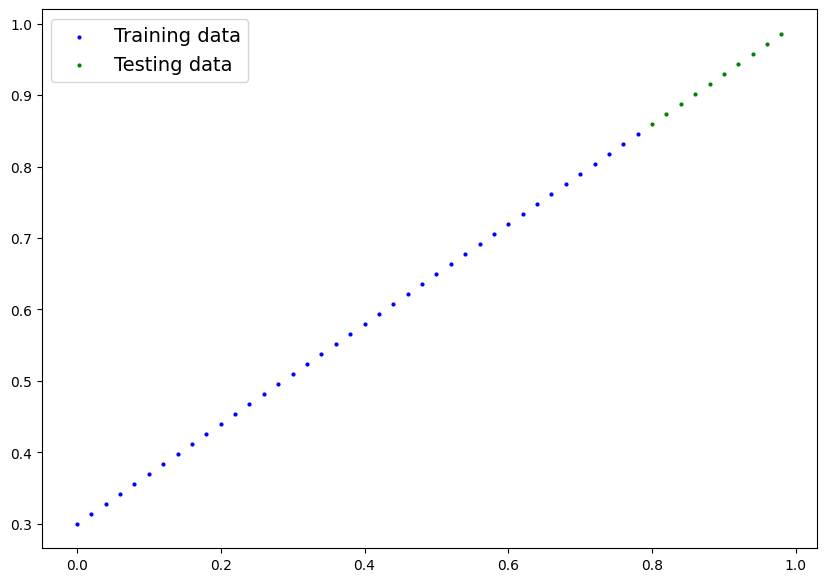

In [7]:
plot_predictions()

## 2. Build model
The first model in this tutorial! Note the OOP-ness.

https://pytorch.org/docs/stable/generated/torch.nn.Module.html


Two main algorithms that enables ML:
1. Gradient descent
2. Backpropagation

Gradient descent is why we have `requires_grad=True`

In [8]:
# Create a linear regression model class

class MyLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
        torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(
        torch.randn(1, requires_grad=True, dtype=torch.float))
    # Use nn.Linear()
    # self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### PyTorch model building essentials

* torch.nn - contains all of the building parts for computational graphs (a neural network is a computational graph)
* torch.nn.Parameter - what parameter should our model try and learn, often a PyTorch layer from torych.nn will set these for us.
* torch.nn.Module - the base class for all neural net modules, if you subclass it, you need to override forward()
* torch.optim - all the optimizers in PyTorch, which drives the gradient descent.
* `def forward()` - all nn.Module subclass require you to override this, and this is where the forward propagation through NN happens.

Some more references to the essentials vis PyTorch cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the content of our PyTorch model

Now we've created a model, let's check what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [9]:
# create a random seed for reproducibility

torch.manual_seed(42)

# Create
model_0 = MyLinearRegressionModel()

model_0

MyLinearRegressionModel()

In [10]:

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# another, easier way to get a read on named parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making a prediction with `torch.inference_mode()`

To check out our model's predctive power, let's see how well it predicts with `y_test` and `x_test`

When we pass data through our model, it's going through the `forward()` method

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### `with torch.inference_mode()`, the gradient tracking is turned off, which makes computation faster, but lose the ability to update the model with gradient

Convention used to be to use `torch.no_grad()`, but `torch.inference_mode()` is a better and newer context manager. Feel free to google the difference between the two.

In [13]:
# Make prediction with inference mode
with torch.inference_mode():
  y_preds = model_0(X_test)


# # Can also do this with the old no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

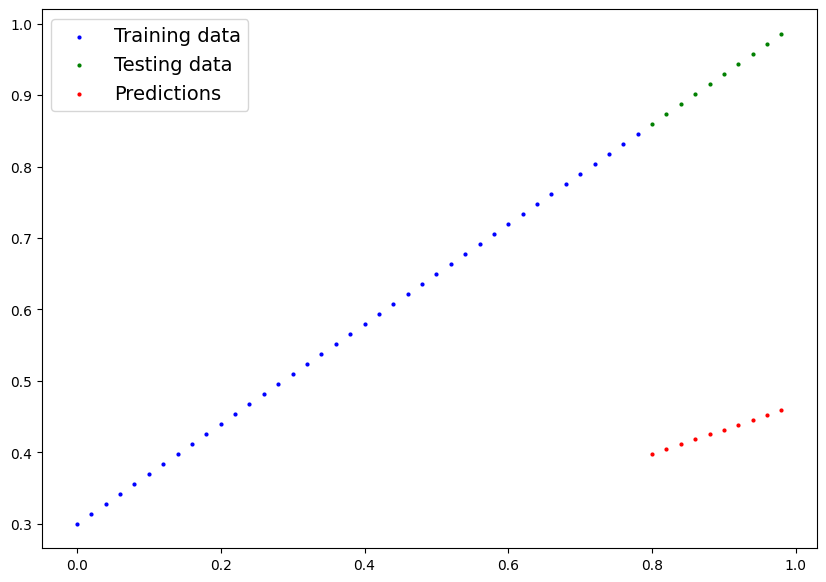

In [14]:
plot_predictions(predictions=y_preds)

### 3. Train models

Training is for a model to move from *unknown* params to some known
params.

Aka. moving from a poor representation of data to a better one.

We measure how poor or how well the predictions are is to use a **loss function**

* Notes: loss function may also be called a cost function, or criterion in different areas.

* **Loss Function**: a function to measure how wrong or how far the model's predictions compared to ground truth
* **Optimizer**: takes the loss function and the value it generates, and use it to update model's params.

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer (with stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


Q: which loss function and optimizer should I use?
A: That's problem specific, and with experience we will have better ideas.

### Building a training loop and a testing loop
A training loop needs:

0. Loop through the data (multiple times)
1. Forward pass or forward propagation (moves our data forward our model)
2. Calculate loss (compare forward pass prediction to ground truth label)
3. Optimizer zero grad
4. Loss backward (move backward through the model network to calculate the gradients)
5. Optimizer steps (use the optimizer to adjust model's parameter with gradient descent)

In [17]:
with torch.no_grad():
  print(list(model_0.parameters()) )

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# An epoch is one loop through all the data
epochs = 200

# Track experiment values
epoch_count = []
train_loss_values = []
test_loss_values = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch

  # 1. Forward pass
  y_preds = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_preds, y_train)
  if epoch % 10 == 0:
    print(f"Loss: {loss}")

  # 3. Optimizer zero grad (otherwise the gradients would accumulate across epochs)
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer steps (aka updates)
  optimizer.step()

  ## Testing, this turns off different settings in the model that are not needed during eval/testing
  ## such as drop outs, batch norm layers
  model_0.eval() # turns off gradient tracking

  with torch.inference_mode(): # this turns off gradient tracking, aka set required_grad=False, and a few other settings
  # with torch.no_grad(): # old ways of turning off gradient tracking
    # 1. Do the forward pass with testing data
    test_preds = model_0(X_test)
    # 2. Caluculate the testing loss with testing data
    test_loss = loss_fn(test_preds, y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.053148526698350906
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Loss: 0.04543796554207802
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Loss: 0.04167863354086876
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', te

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [22]:
weight, bias

(0.7, 0.3)

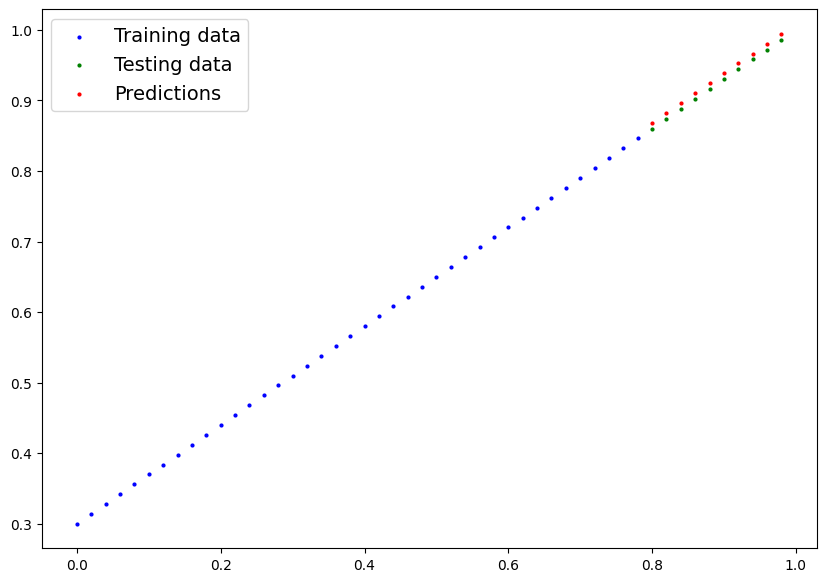

In [23]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [24]:
import numpy as np
np.array(torch.tensor(train_loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

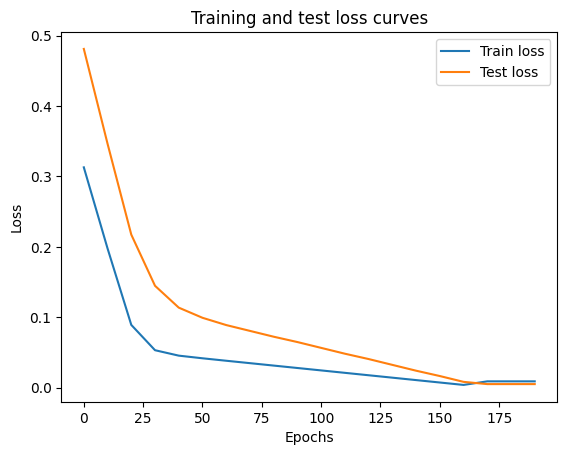

In [25]:
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving and Loading Models in PyTorch

There are three main methods we should know about for saving and loading models in PyTorch.
1. `torch.save()` - allows saving PyTorch objects into Python's pickle format (Python's binary)
2. `torch.load()` - allows loading from a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary (the weights and biases)


https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [26]:
from re import M
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # 'pth' or 'pt' is convention for pytorch model saved file extension.
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model_0.pth


In [27]:
!ls -l models/

total 4
-rw-r--r-- 1 root root 1680 May 26 22:28 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()`, we'll create a new instance of our model class and load the saved`state_dict()` into that.


In [28]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = MyLinearRegressionModel()

loaded_model_0.state_dict() # this should have randomized default parameters

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [30]:
# Load the saved state_dict of model_0 from before (this will update the new instance
# with the parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [31]:
# check out the loaded state_dict
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
# Make some prediction using the newly loaded model
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [33]:
# Compare loaded model preds with original model preds, and they should be equal

test_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting things together

All the steps put in one place.

In [34]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.6.0+cu124'

Create device agnostic code.
 This means if we have access to a GPU, our code will use it. If not, the code will default to CPU

In [35]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [36]:
!nvidia-smi

Mon May 26 22:28:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 6.1 Data

In [37]:
# Create some data using the linear regression formula y = weight * X + bias

weight = 0.67
bias = 0.11

# create range values
start = 0
end = 1
step = 0.02

# create X and Y, aka features and labels
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, we will have errors about dimensions
y = weight * X + bias

# small preview
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1100],
         [0.1234],
         [0.1368],
         [0.1502],
         [0.1636],
         [0.1770],
         [0.1904],
         [0.2038],
         [0.2172],
         [0.2306]]))

In [38]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

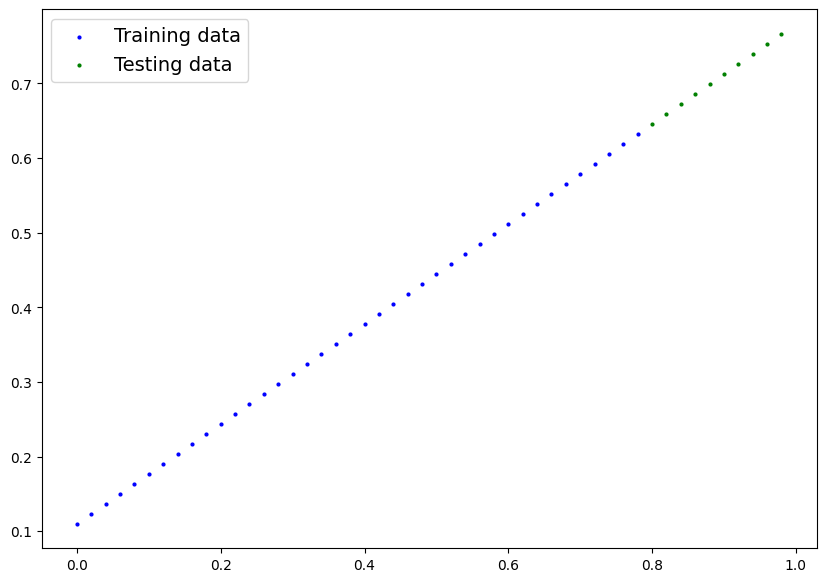

In [39]:
# Plot the data
# Note: if you don't have plot_prediction() function loaded from earlier part of the notebook, this will error out
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 building a PyTorch Linear Model

In [40]:
# Create a linear model by subclassing nn.Module
class MyLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # User nn.Linear() for creating the model parameters, also called linear transform, fully connected
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = MyLinearRegressionModel()
model_1, model_1.state_dict()

(MyLinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [41]:
# Check the model's device
next(model_1.parameters()).device

device(type='cpu')

In [42]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizier
* Training loop
* Testing loop


In [43]:
# Set up the loss function
loss_fn = nn.L1Loss() # could use others like RMSELoss()

# Set up the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [49]:
# Training loop
torch.manual_seed(42)

# number or times to go through the entire dataset
epochs = 200

# Put data on target device too, in a device agnostic way just like our model
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Set zero grad to Optimizer\
  optimizer.zero_grad()

  # 4. Backprop
  loss.backward()

  # 5. Optimizer take one step
  optimizer.step()

  ### Testing
  model_1.eval() # set to eval mode first so model get keep training
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.19577884674072266 | Test loss: 0.3192131221294403
Epoch: 10 | Loss: 0.08194055408239365 | Test loss: 0.18652987480163574
Epoch: 20 | Loss: 0.041682299226522446 | Test loss: 0.11169546842575073
Epoch: 30 | Loss: 0.03555610403418541 | Test loss: 0.0859374925494194
Epoch: 40 | Loss: 0.03202485665678978 | Test loss: 0.07491745799779892
Epoch: 50 | Loss: 0.028573250398039818 | Test loss: 0.06595807522535324
Epoch: 60 | Loss: 0.025134438648819923 | Test loss: 0.057685595005750656
Epoch: 70 | Loss: 0.021705299615859985 | Test loss: 0.05010000988841057
Epoch: 80 | Loss: 0.018269618973135948 | Test loss: 0.041827525943517685
Epoch: 90 | Loss: 0.014831796288490295 | Test loss: 0.034241944551467896
Epoch: 100 | Loss: 0.011403351090848446 | Test loss: 0.025969458743929863
Epoch: 110 | Loss: 0.007965987548232079 | Test loss: 0.01769697107374668
Epoch: 120 | Loss: 0.0045298426412045956 | Test loss: 0.010111427865922451
Epoch: 130 | Loss: 0.0020134509541094303 | Test loss: 0.005782